In [37]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import jieba
import jieba.analyse
from collections import Counter  # 次數統計

# File paths
stopfile = '/Users/mankiwong/Desktop/stopwords.txt'  # Stopwords file
fontpath = '/System/Library/Fonts/Supplemental/Songti.ttc'  # Font file for Chinese characters
mdfile = '/Users/mankiwong/Desktop/小红书.txt'  # Input Excel file

# Set stopwords for jieba
jieba.analyse.set_stop_words(stopfile)

text = open(mdfile,"r",encoding="utf-16").read()

# Extract top 50 keywords using jieba
tags = jieba.analyse.extract_tags(text, topK=50)

# Segment the text into words
seg_list = jieba.lcut(text, cut_all=False)

# Count word frequencies
dictionary = Counter(seg_list)

# Filter frequencies for the extracted keywords
freq = {word: dictionary[word] for word in tags if word in dictionary}
print(freq)  # Print the word frequencies

{'指令': 123, '论文': 97, '内容': 135, '文献': 92, '分享': 82, '生成': 90, '模型': 83, '使用': 125, '对话': 75, '问题': 139, '思考': 74, '复制': 66, '繁忙': 60, 'gpt': 41, '服务器': 52, '回答': 88, '加入': 77, '感觉': 76, '深度': 61, '老师': 61, '工具': 61, '喜欢': 65, 'R1': 31, '邀请': 49, '消息': 67, '免费': 47, '聊天': 40, '研究': 75, '用户': 47, '降重': 26, '试试': 38, '结果': 62, '打开': 50, '提问': 34, '查重': 23, '设定': 34, '信息': 51, '回复': 36, '一键': 24, '搜索': 34, 'GPT': 21, '体验': 33, '答案': 36, '模板': 23, '时间': 59, '语言': 39, '数据': 50, '教程': 24, '好用': 22, '有点': 41}


{'指令': 123, '论文': 97, '内容': 135, '文献': 92, '分享': 82, '生成': 90, '模型': 83, '使用': 125, '对话': 75, '问题': 139, '思考': 74, '复制': 66, '繁忙': 60, 'gpt': 41, '服务器': 52, '回答': 88, '加入': 77, '感觉': 76, '深度': 61, '老师': 61, '工具': 61, '喜欢': 65, 'R1': 31, '邀请': 49, '消息': 67, '免费': 47, '聊天': 40, '研究': 75, '用户': 47, '降重': 26, '试试': 38, '结果': 62, '打开': 50, '提问': 34, '查重': 23, '设定': 34, '信息': 51, '回复': 36, '一键': 24, '搜索': 34, 'GPT': 21, '体验': 33, '答案': 36, '模板': 23, '时间': 59, '语言': 39, '数据': 50, '教程': 24, '好用': 22, '有点': 41}


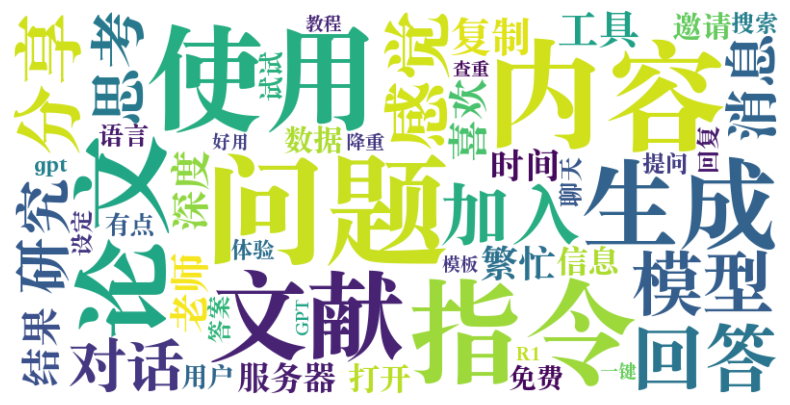

In [28]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import jieba
import jieba.analyse
from collections import Counter  # 次數統計

# File paths
stopfile = '/Users/mankiwong/Desktop/stopwords.txt'  # Stopwords file
fontpath = '/System/Library/Fonts/Supplemental/Songti.ttc'  # Font file for Chinese characters
mdfile = '/Users/mankiwong/Desktop/小红书.txt'  # Input Excel file

# Set stopwords for jieba
jieba.analyse.set_stop_words(stopfile)

text = open(mdfile,"r",encoding="utf-16").read()

# Extract top 50 keywords using jieba
tags = jieba.analyse.extract_tags(text, topK=50)

# Segment the text into words
seg_list = jieba.lcut(text, cut_all=False)

# Count word frequencies
dictionary = Counter(seg_list)

# Filter frequencies for the extracted keywords
freq = {word: dictionary[word] for word in tags if word in dictionary}
print(freq)  # Print the word frequencies

# Generate the word cloud
wordcloud = WordCloud(
    background_color="white",  # Background color
    contour_width=3,           # Contour width
    contour_color='steelblue', # Contour color
    font_path=fontpath,        # Font for Chinese characters
    width=800,                 # Width of the word cloud
    height=400                 # Height of the word cloud
).generate_from_frequencies(freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.show()

In [42]:
import pandas as pd
from pyecharts.charts import Pie
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from snownlp import SnowNLP

def analyze_sentiments_and_show_pie():
    # Read Excel file
    df = pd.read_excel('/Users/mankiwong/Desktop/小红书.xlsx', sheet_name='Sheet1')
    
    pos_count = 0   # Positive
    mid_count = 0   # Neutral
    neg_count = 0   # Negative

    columns_to_analyze = ['Title', 'Content', 'Comment1', 'Comment2']

    for column in columns_to_analyze:
        if column not in df.columns:
            continue
        
        for comment in df[column]:
            if pd.isna(comment):
                continue
            
            comment = str(comment)
            sentiments_score = SnowNLP(comment).sentiments
            if sentiments_score < 0.4:
                neg_count += 1
            elif 0.4 <= sentiments_score <= 0.6:
                mid_count += 1
            else:
                pos_count += 1

    # Create the pie chart
    pie = (
        Pie(init_opts=opts.InitOpts(theme=ThemeType.CHALK, width='800px', height='600px'))
        .add(
            series_name='Sentiment Distribution',
            data_pair=[
                ['Positive', pos_count],
                ['Neutral', mid_count],
                ['Negative', neg_count]
            ],
            rosetype='radius',
            radius=['30%', '55%'],
        )
        .set_global_opts(
           
            legend_opts=opts.LegendOpts(pos_left='right', orient='vertical')
        )
        .set_series_opts(label_opts=opts.LabelOpts(formatter='{b}: {c} ({d}%)'))
    )

    # Render in Jupyter Notebook
    return pie.render_notebook()

analyze_sentiments_and_show_pie()

In [43]:
import pandas as pd
from pyecharts.charts import Pie
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from snownlp import SnowNLP

# Set the theme
theme_config = ThemeType.CHALK

def pie2():
    # Read the Excel file
    df = pd.read_excel('/Users/mankiwong/Desktop/小红书.xlsx', sheet_name='Sheet1')  # Adjust sheet name if necessary

    # Initialize counters for sentiment analysis
    pos_count = 0   # Positive
    mid_count = 0   # Neutral
    neg_count = 0   # Negative

    # Define the columns to analyze
    columns_to_analyze = ['Title', 'Content', 'Comment1', 'Comment2']  # Adjust column names if necessary

    # Iterate over the specified columns
    for column in columns_to_analyze:
        if column not in df.columns:  # Skip if column is not in the DataFrame
            continue

        for comment in df[column]:  # Iterate over the rows in the column
            if pd.isna(comment):  # Skip NaN values
                continue
            comment = str(comment)
            sentiments_score = SnowNLP(comment).sentiments
            if sentiments_score < 0.4:
                neg_count += 1
            elif 0.4 <= sentiments_score <= 0.6:
                mid_count += 1
            else:
                pos_count += 1

    # Create the pie chart
    pie = (
        Pie(init_opts=opts.InitOpts(theme=theme_config, width='450px', height='350px', chart_id=3))
        .add(
            series_name='Sentiment Distribution',
            data_pair=[
                ['Positive', pos_count],
                ['Neutral', mid_count],
                ['Negative', neg_count]
            ],
            rosetype='radius',
            radius=['30%', '55%'],
        )
        .set_global_opts(
            legend_opts=opts.LegendOpts(pos_left='right', orient='vertical')
        )
        .set_series_opts(label_opts=opts.LabelOpts(formatter='{b}: {c}'))
    )

    # Render the pie chart to an HTML file
    pie.render('1.html')
    print('success')
    return pie

# Call the function
pie2()

success


In [34]:
df = pd.read_excel('/Users/mankiwong/Desktop/小红书.xlsx')

In [35]:
total_non_nan_values = df.notna().sum().sum()
print(f"Total number of cells with values: {total_non_nan_values}")

Total number of cells with values: 766
